<a href="https://www.hydroffice.org/openbst/"><img src="images/xsf.png" alt="XSF" title="Open OpenBST home page" align="center" width="12%" alt="XSF logo"></a>

# How to Inspect the XSF File Content

This notebook shows how to load and display the content of an Extensible Sounder Format (XSF) file.

## Import the Required Libraries

In [1]:
# use 'matplotlib inline' to avoid the plot interactivity
%matplotlib notebook

import os
import numpy as np
import netCDF4  as nc
import matplotlib.pyplot as plt
from hyo2.abc.lib.testing import Testing

## Retrieve XSF File Path

In [3]:
# index of the XSF to use (it is a parameter!)
xsf_idx = 0

# use an helper class to retrieve all the files with .xsf extension in the "download" folder
data_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir))
testing = Testing(root_folder=data_folder)
xsf_files = testing.download_test_files(ext=".xsf")
nr_xsf_files = len(xsf_files)
if xsf_idx >= nr_xsf_files:
    raise RuntimeError("Not enough XSF files were retrieved for using %d index!" % xsf_idx)
print("Nr. of available XSF files: %s" % nr_xsf_files)

# select the XSF file path
xsf_path = xsf_files[xsf_idx]
print("Path to the selected XSF file: %s" % xsf_path)

Nr. of available XSF files: 4
Path to the selected XSF file: C:\code\hyo2\backscatter\hyo2_openbst\data\download\0011_20180908_150242.xsf


## Plot the XSF Content

OrderedDict()
-> backscatter_count


<IPython.core.display.Javascript object>

-> backscatter_offset


<IPython.core.display.Javascript object>

SKIP: backscatter_r (listed to ignore)
-> beam_direction_x


<IPython.core.display.Javascript object>

-> beam_direction_y


<IPython.core.display.Javascript object>

-> beam_direction_z


<IPython.core.display.Javascript object>


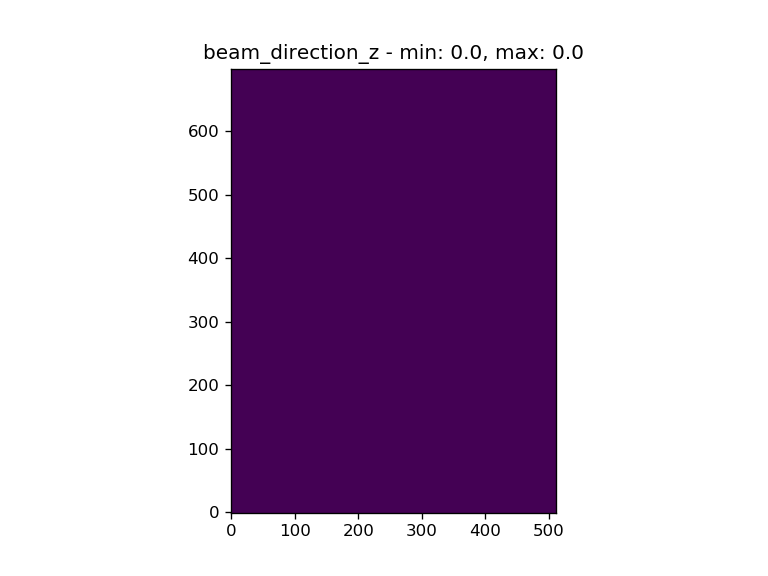

-> beamwidth_receive_major


<IPython.core.display.Javascript object>


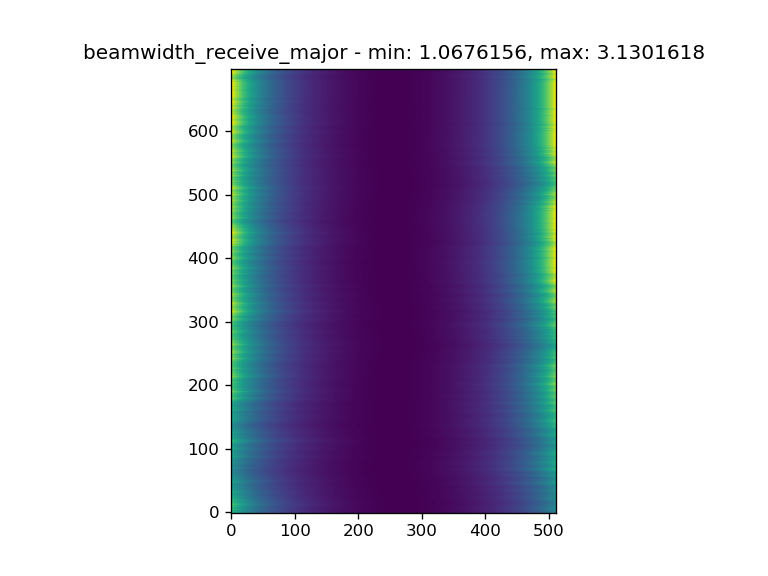

SKIP: beamwidth_receive_minor (all nan values)
SKIP: beamwidth_transmit_major (all nan values)
-> beamwidth_transmit_minor


<IPython.core.display.Javascript object>

-> detection_beam_pointing_angle


<IPython.core.display.Javascript object>

-> detection_backscatter_calibration


<IPython.core.display.Javascript object>

SKIP: detection_constructor_quality_factor (all nan values)
SKIP: detection_ifremer_quality_factor (all nan values)
-> detection_latitude


<IPython.core.display.Javascript object>


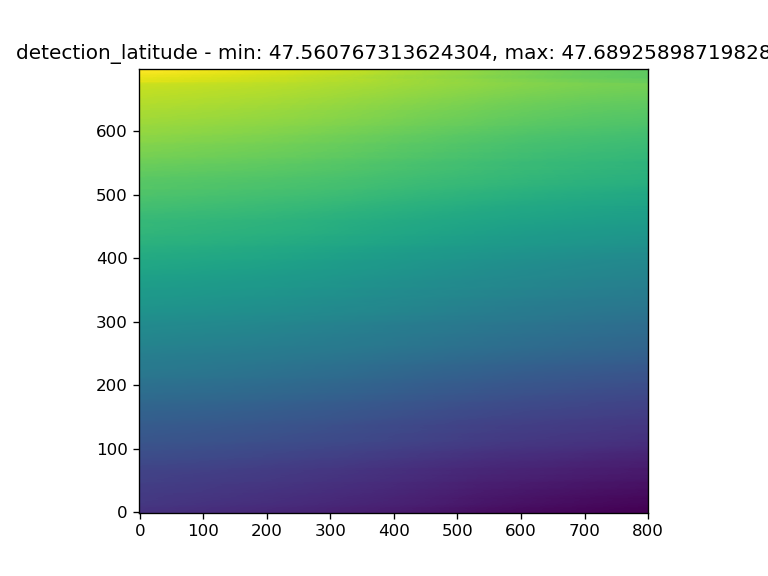

-> detection_longitude


<IPython.core.display.Javascript object>

-> detection_mean_absorption_coefficient


<IPython.core.display.Javascript object>


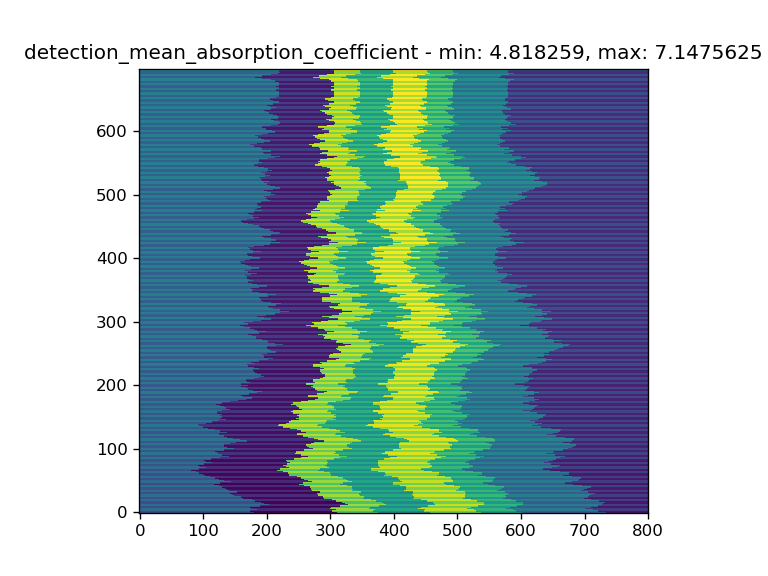

SKIP: detection_receiver_sensitivity_applied (all nan values)
-> detection_backscatter


<IPython.core.display.Javascript object>


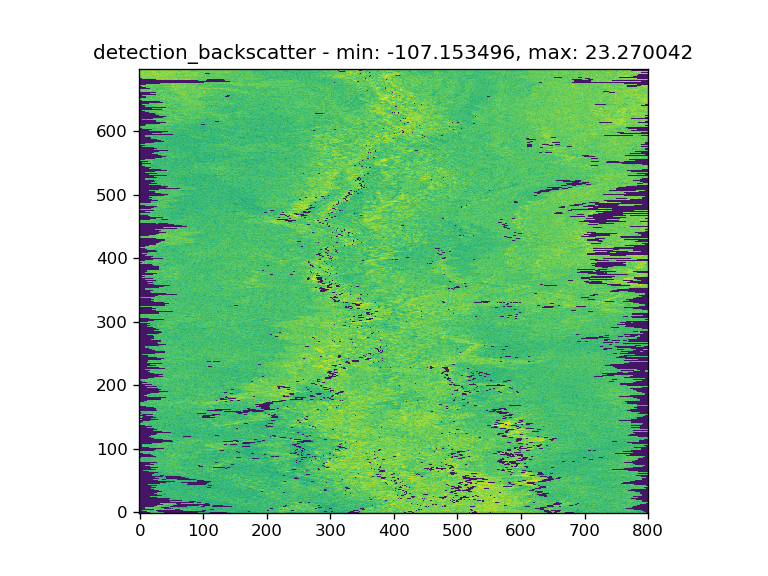

-> detection_rx_transducer_index


<IPython.core.display.Javascript object>


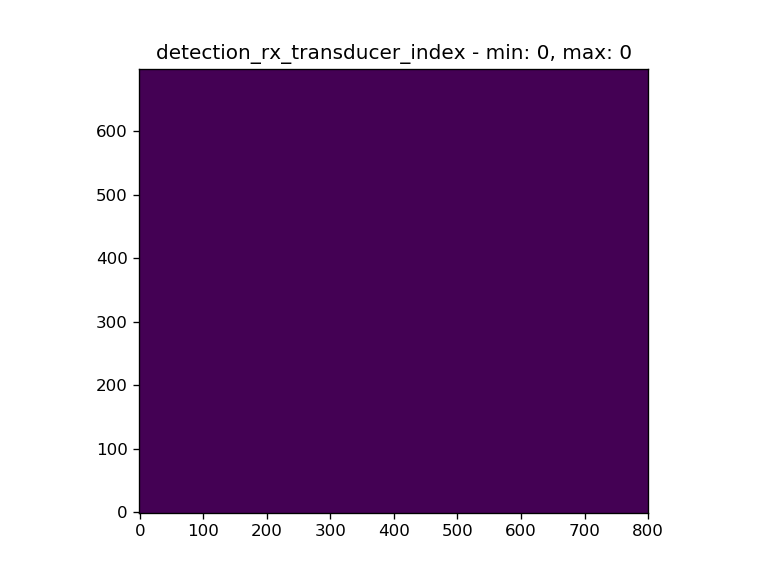

-> detection_source_level_applied


<IPython.core.display.Javascript object>


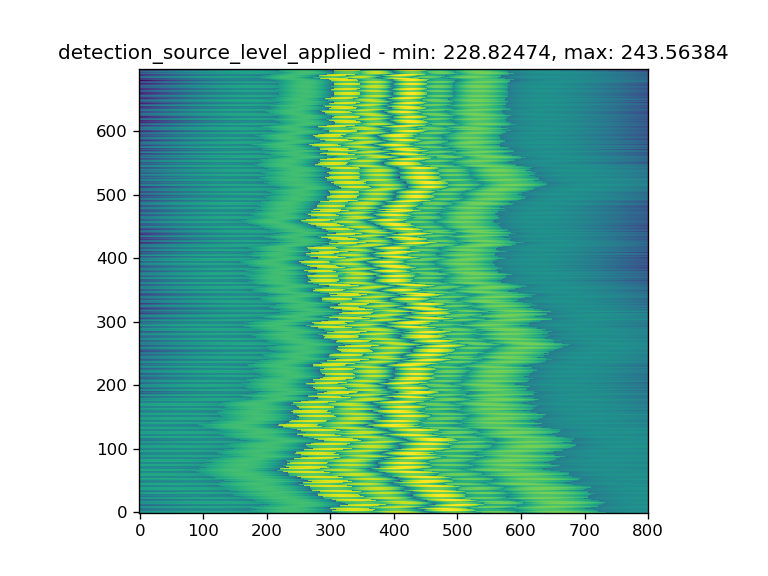

-> detection_time_varying_gain


<IPython.core.display.Javascript object>


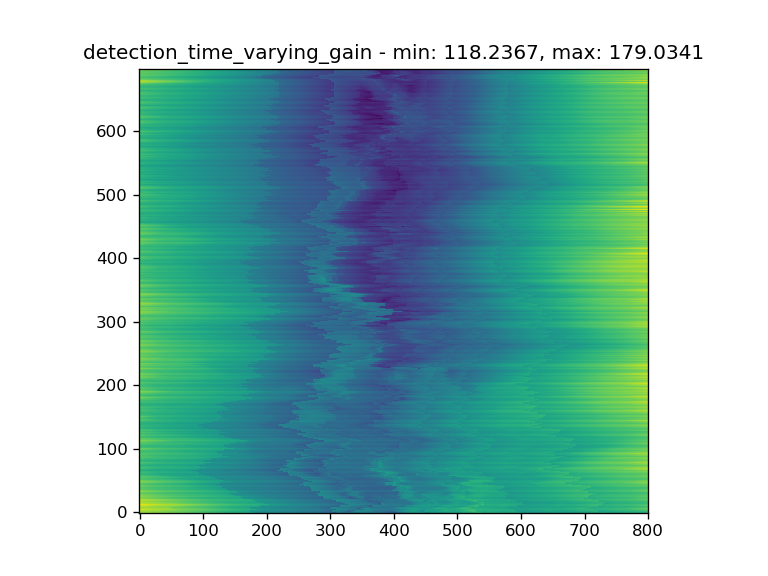

-> detection_two_way_travel_time


<IPython.core.display.Javascript object>


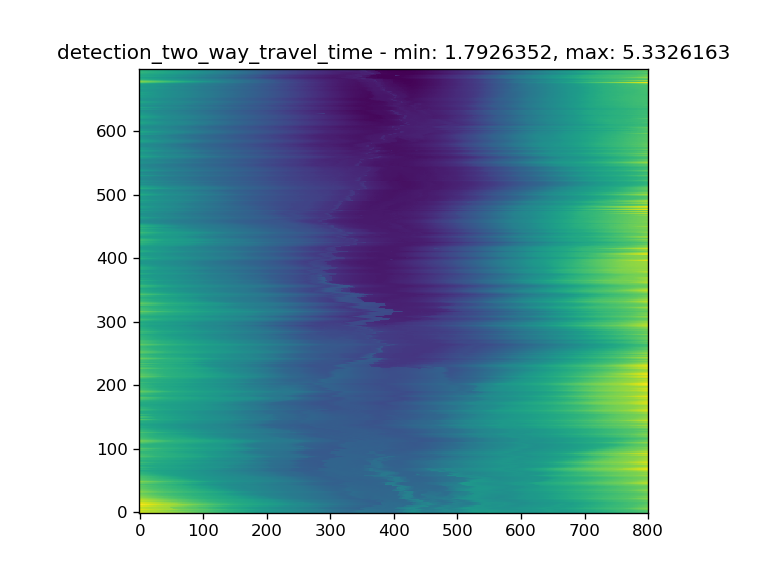

-> detection_tx_sector


<IPython.core.display.Javascript object>


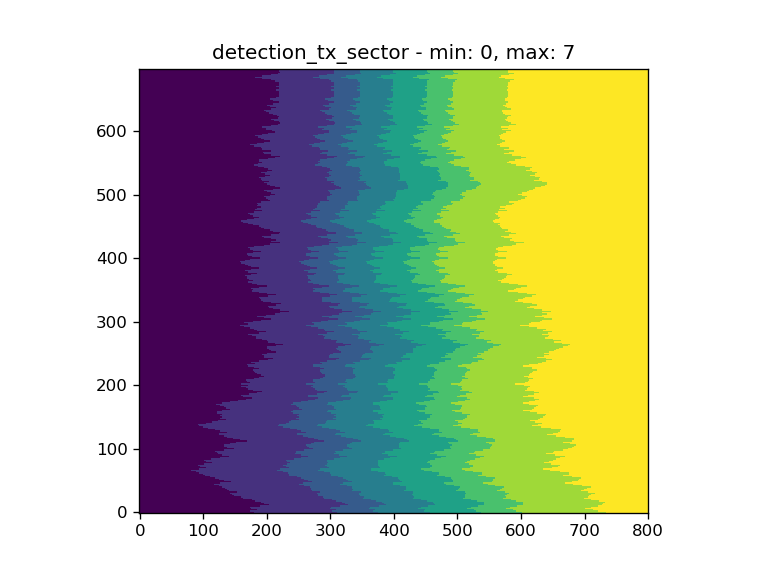

-> detection_tx_transducer_index


<IPython.core.display.Javascript object>


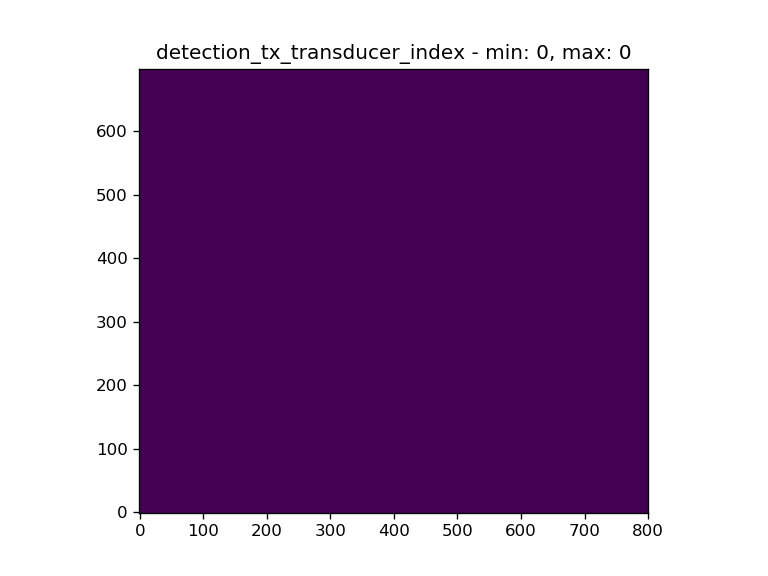

-> detection_type


<IPython.core.display.Javascript object>


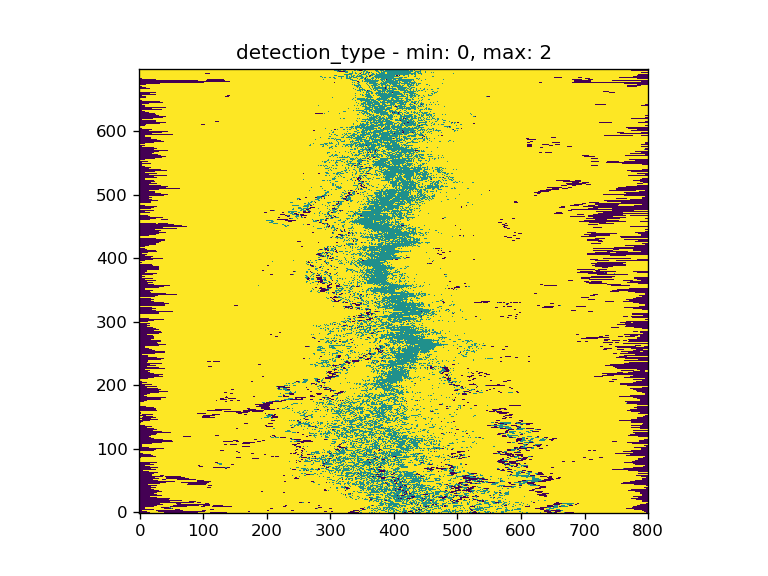

-> detection_x


<IPython.core.display.Javascript object>


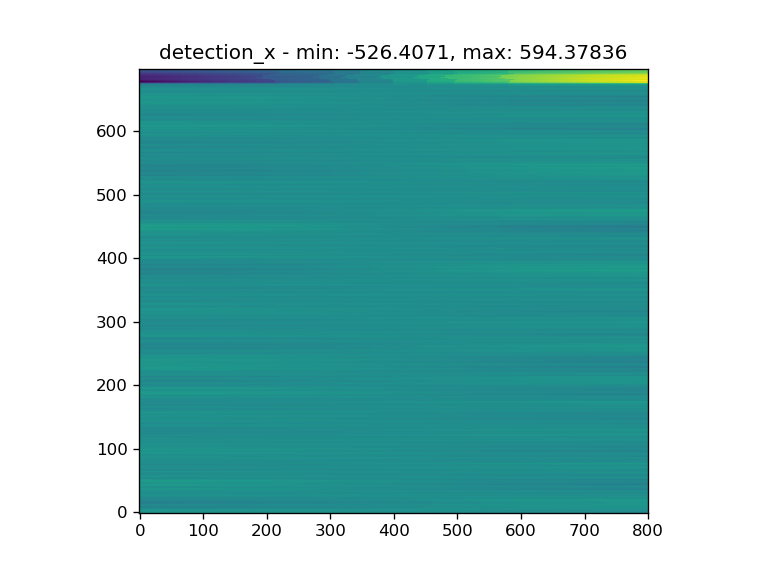

-> detection_y


<IPython.core.display.Javascript object>


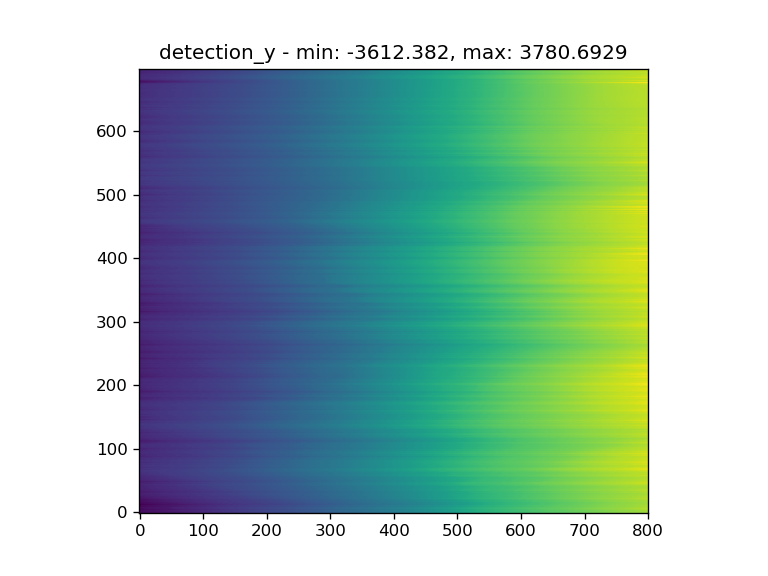

-> detection_z


<IPython.core.display.Javascript object>


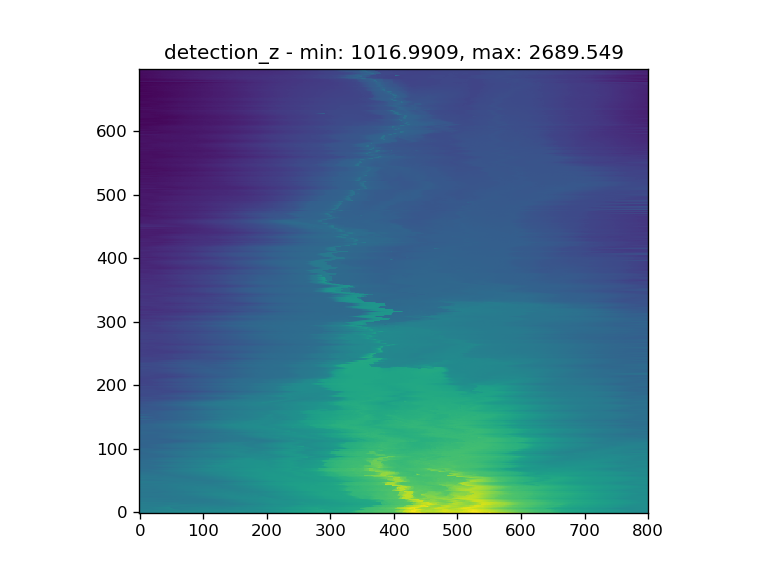

SKIP: equivalent_beam_angle (all nan values)
-> ping


<IPython.core.display.Javascript object>


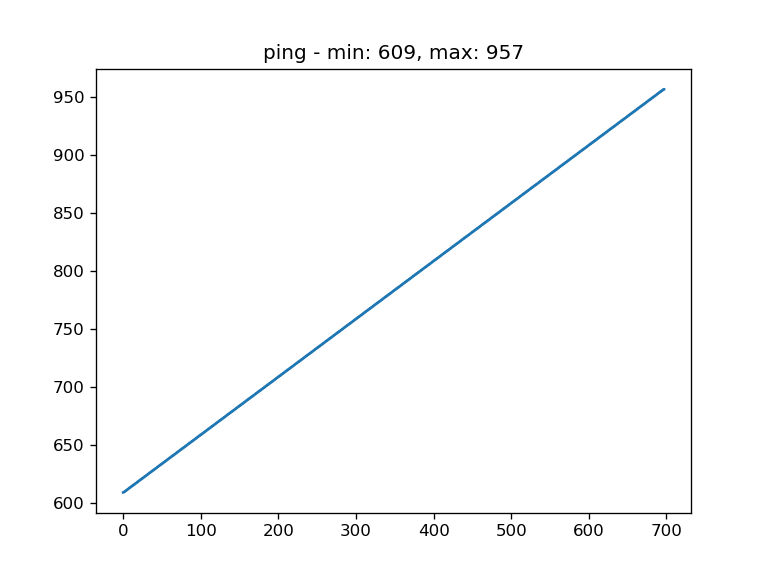

-> platform_heading


<IPython.core.display.Javascript object>


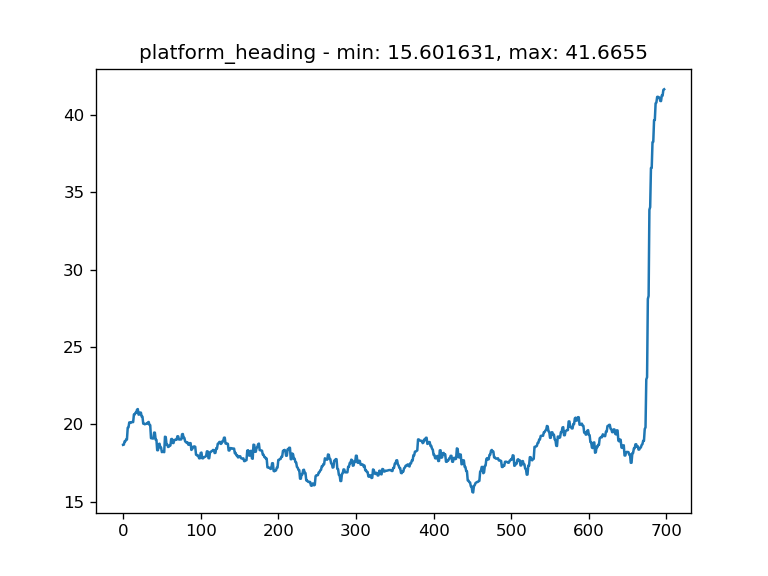

-> platform_latitude


<IPython.core.display.Javascript object>


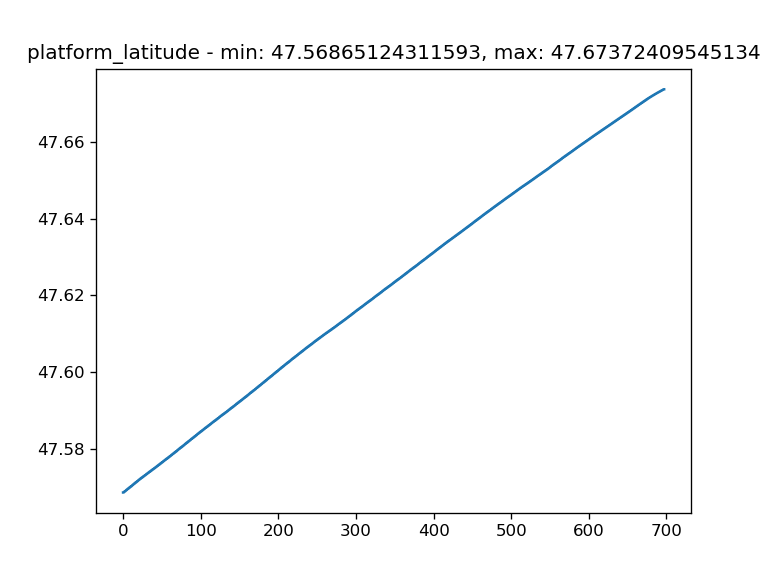

-> platform_longitude


<IPython.core.display.Javascript object>


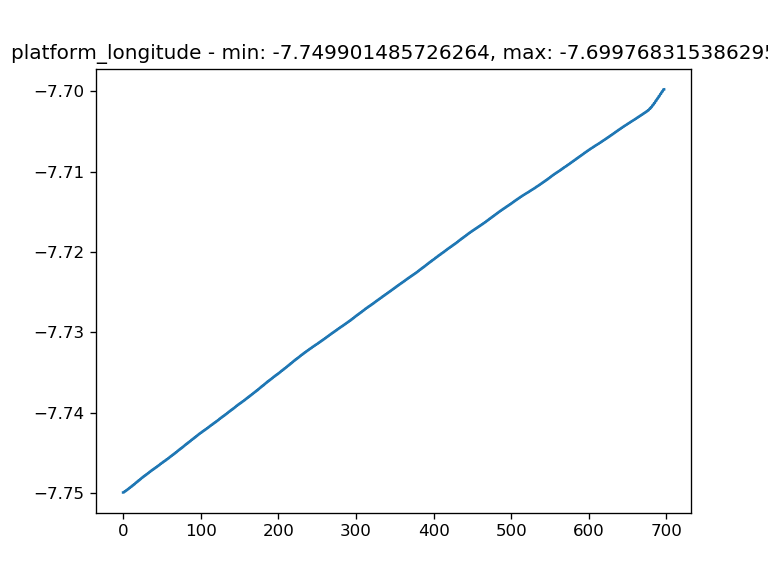

-> platform_pitch


<IPython.core.display.Javascript object>


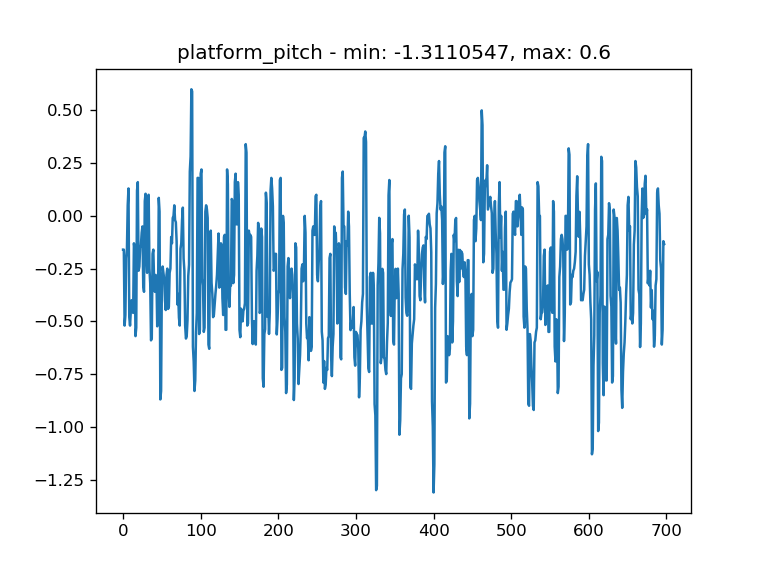

-> platform_roll


<IPython.core.display.Javascript object>


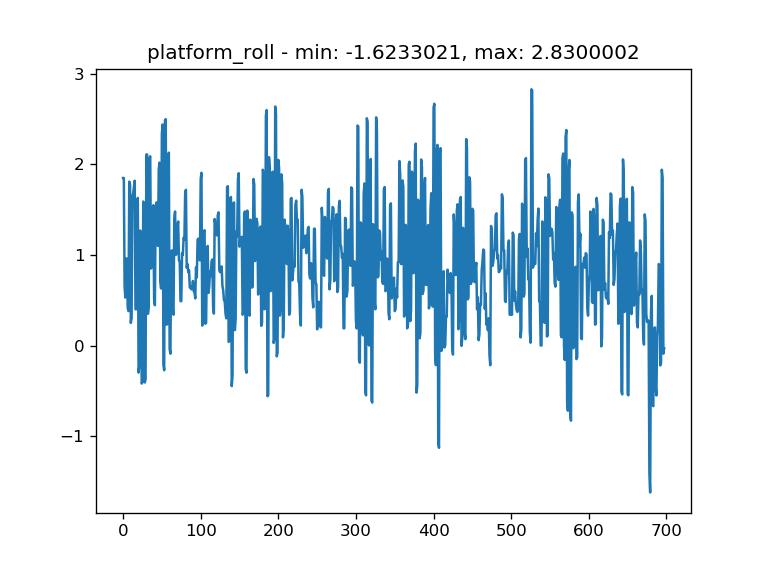

-> platform_vertical_offset


<IPython.core.display.Javascript object>


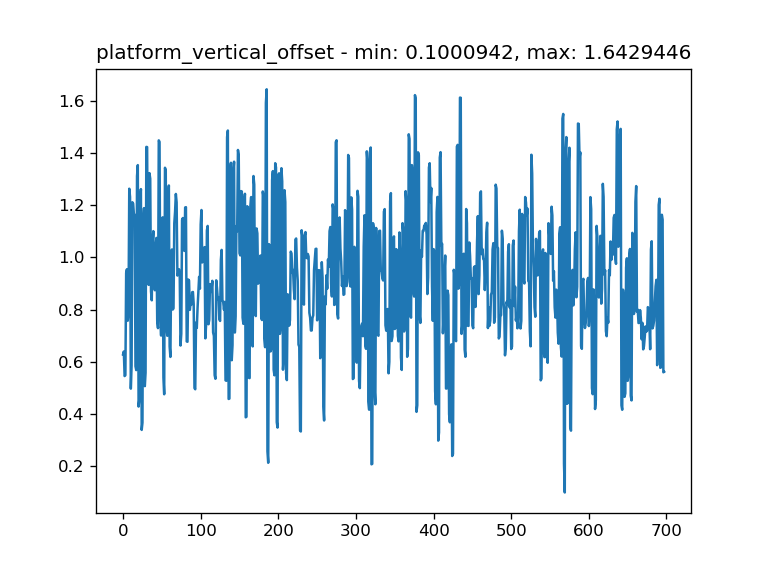

-> sector


<IPython.core.display.Javascript object>


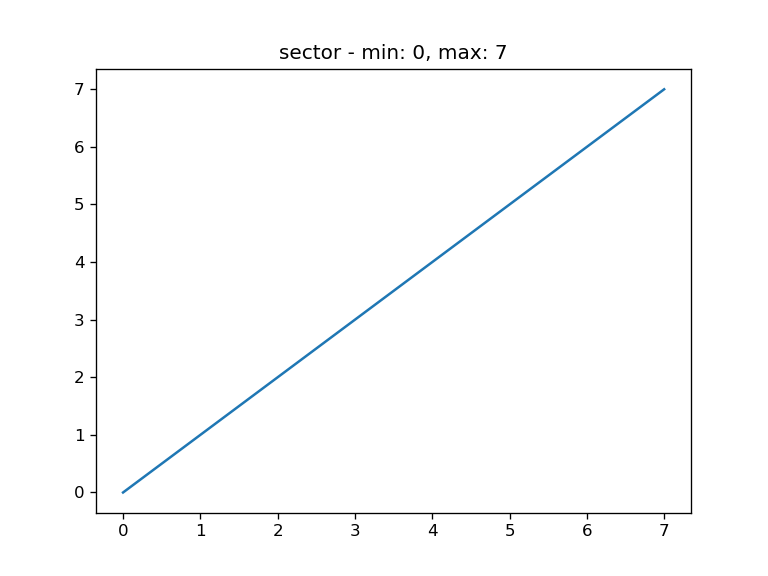

-> sound_speed_at_transducer


<IPython.core.display.Javascript object>


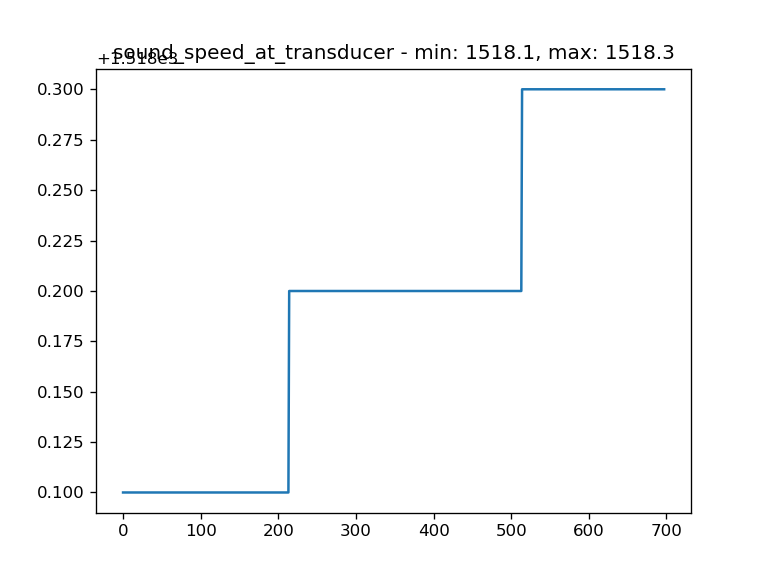

-> status


<IPython.core.display.Javascript object>


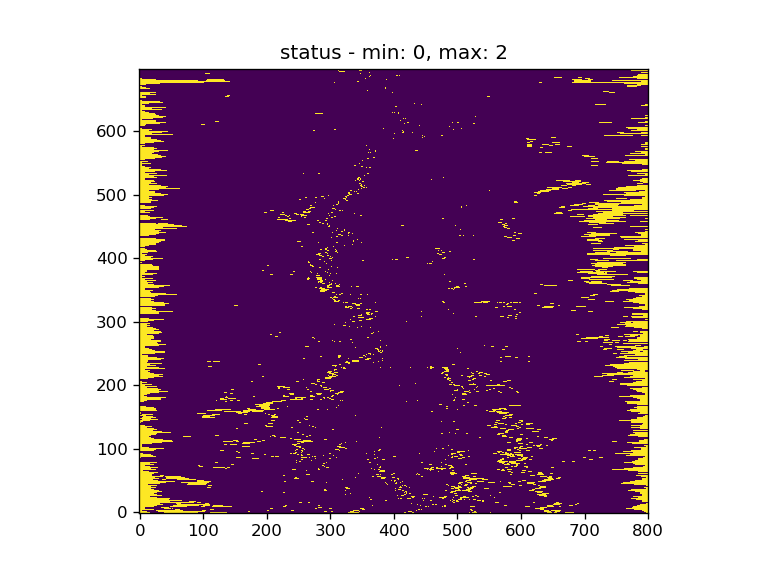

-> status_detail


<IPython.core.display.Javascript object>


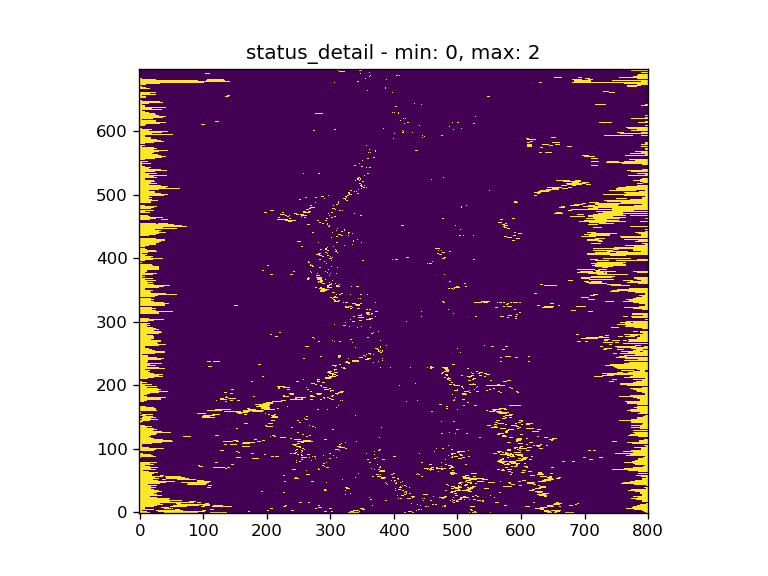

-> swath_dynamic_draught


<IPython.core.display.Javascript object>


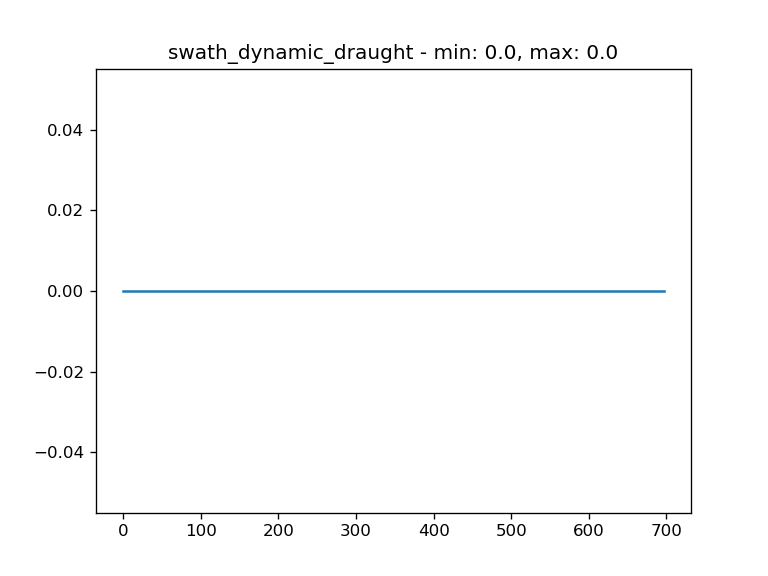

-> swath_tide


<IPython.core.display.Javascript object>

-> swath_time


<IPython.core.display.Javascript object>


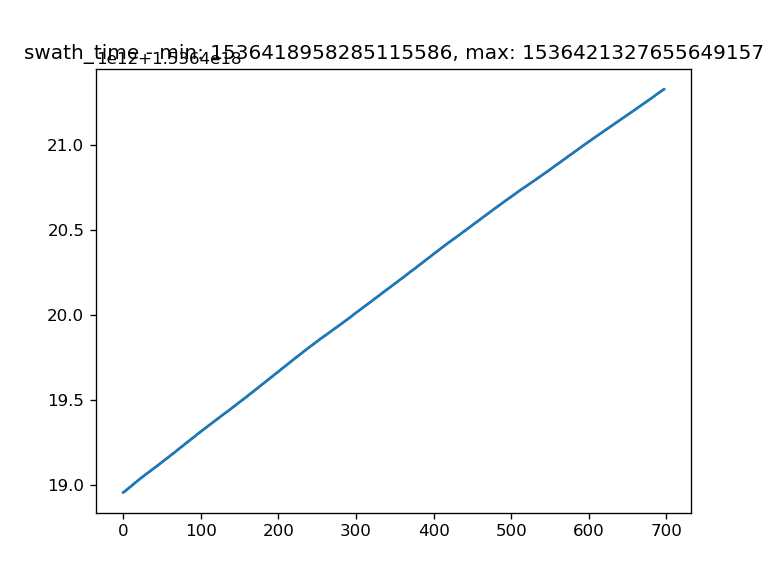

-> tx_center_frequency


<IPython.core.display.Javascript object>

-> tx_tilt_angle


<IPython.core.display.Javascript object>

-> tx_transducer_zdepth


<IPython.core.display.Javascript object>

-> sample_interval


<IPython.core.display.Javascript object>


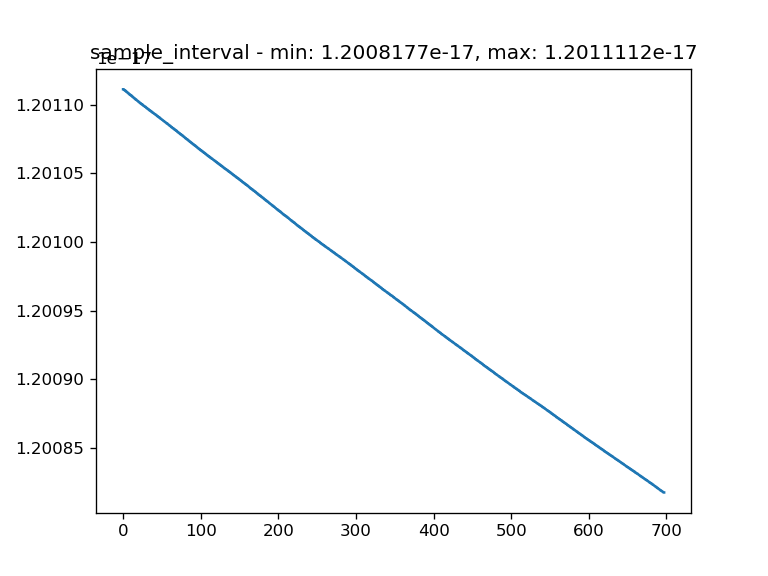

-> sample_time_offset


<IPython.core.display.Javascript object>


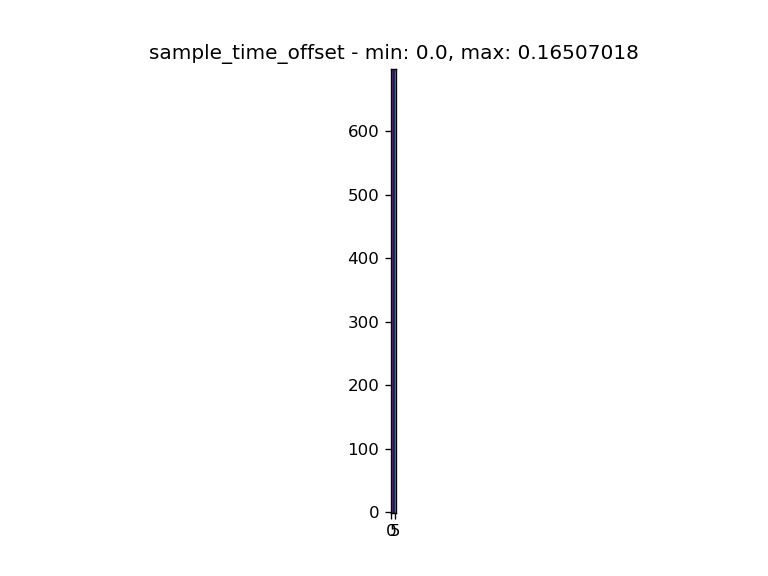

-> sample_start_offset


<IPython.core.display.Javascript object>

-> beam_detection_range


<IPython.core.display.Javascript object>


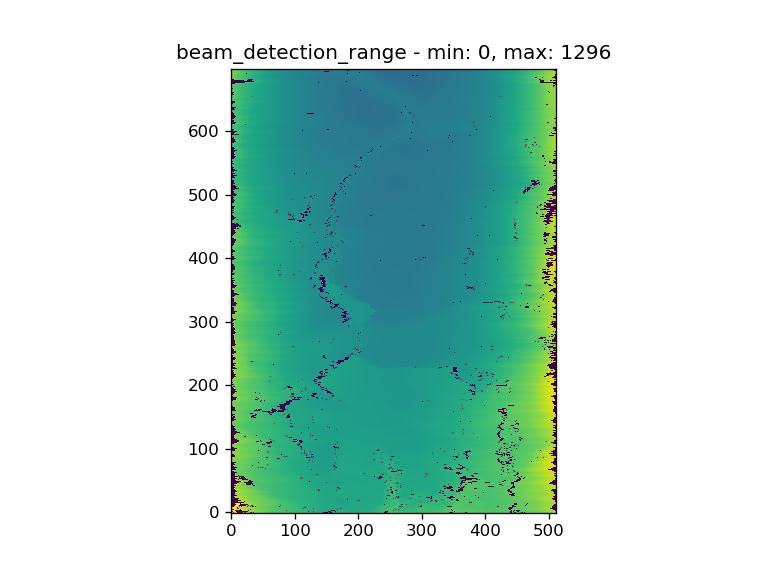

-> beam_sector


<IPython.core.display.Javascript object>


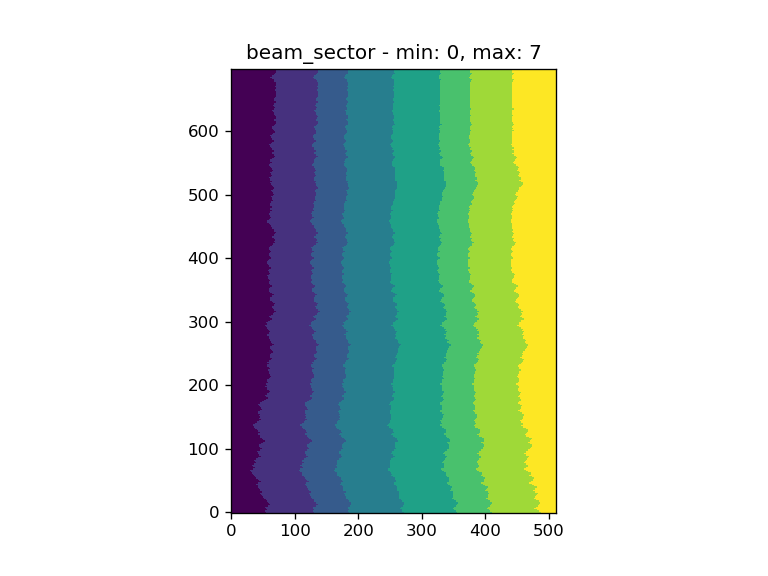

-> beam_rx_transducer_index


<IPython.core.display.Javascript object>


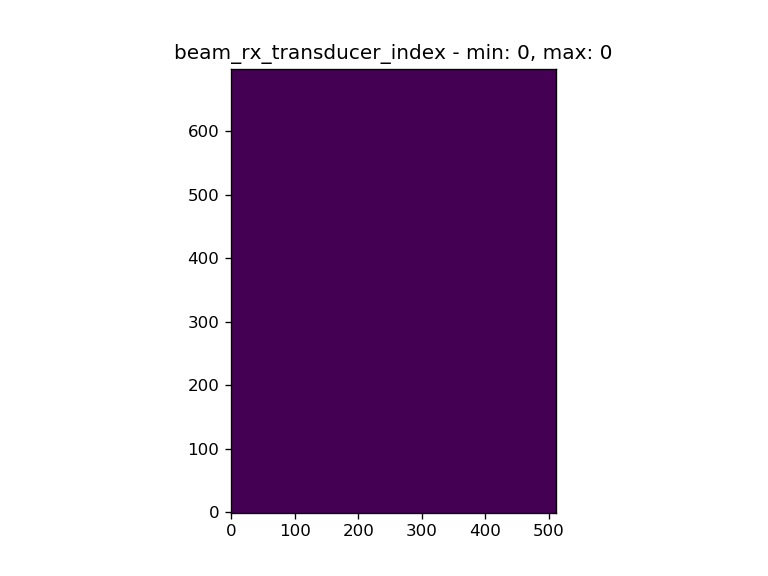

In [4]:
# modify to suppress/have UserWarnings and RuntimeWarnings
suppress_user_warnings = True
suppress_runtime_warnings = True
if suppress_user_warnings:
    import warnings
    warnings.filterwarnings("ignore", category=UserWarning)
if suppress_runtime_warnings:
    import warnings
    warnings.filterwarnings("ignore", category=RuntimeWarning)    

# modify to change the size of the plots
plt.rcParams['figure.dpi'] = 120

# modify to add/remove variables to ignore
vars_to_ignore = ["backscatter_r", ]

with nc.Dataset(xsf_path) as root:
    
    beam_group_ds = root['/root/sonar/beam/Beam_group1/']
    
    print(beam_group_ds.cmptypes)
    
    for var_name in beam_group_ds.variables:
        
        # ignore variables currently with issues
        if var_name in vars_to_ignore:
            print("SKIP: %s (listed to ignore)" % (var_name, )) 
            continue
               
        var = beam_group_ds.variables[var_name]       
        if var.ndim not in [1, 2]:
            print("SKIP: %s (unsupported nr of dims: %d)" % (var_name, var.ndim)) 
            continue
        if np.isnan(var).all():
            print("SKIP: %s (all nan values)" % (var_name, )) 
            continue            
        print("-> %s" % var_name)    
    
        plt.figure()
        
        try:
            plt.title("%s - min: %s, max: %s" % (var_name, np.nanmin(var), np.nanmax(var)))
        except:
            plt.title(var_name)
            
        try:
            if var.ndim == 1:
                plt.plot(var)
                
            elif var.ndim == 2:
                plt.imshow(var, origin='lower')

        except Exception as e:
            print("SKIP: %s (%s)" % (var_name, e))

The above plots show the content for the selected XSF file.